<a href="https://colab.research.google.com/github/MeryemBenz/stockpricetracker/blob/main/stockpricetracker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

[*********************100%***********************]  1 of 1 completed
<ipython-input-23-4b0f07a94faa>:14: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  last_close = float(data['Close'].iloc[-1])


ALERT: AAPL is ABOVE $150 (Current: $191.38)


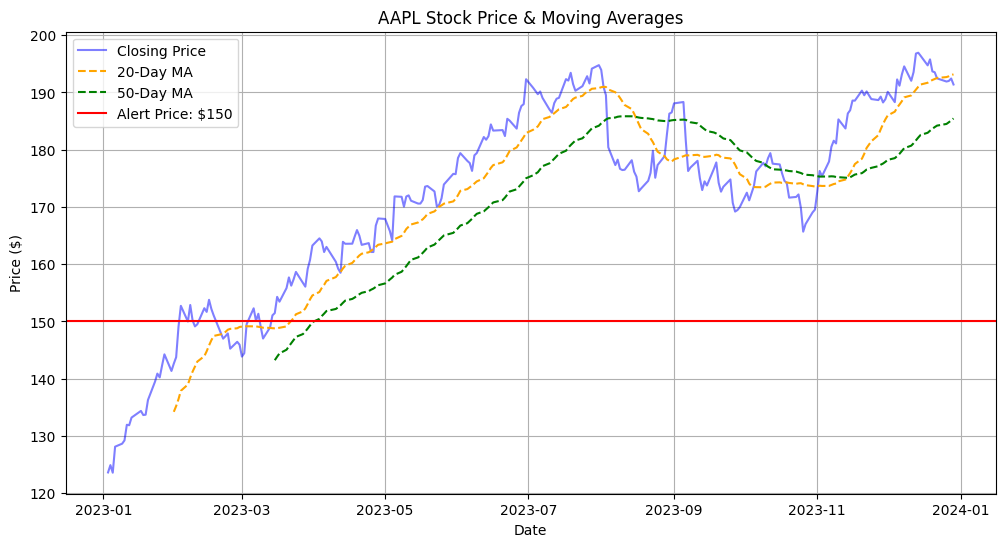

In [23]:
def stock_price_tracker(ticker, start_date, end_date, alert_price=None):

    data = yf.download(ticker, start=start_date, end=end_date)

    if data.empty:
        print("No data found for the given ticker and date range.")
        return


    data['MA_20'] = data['Close'].rolling(window=20).mean()
    data['MA_50'] = data['Close'].rolling(window=50).mean()


    last_close = float(data['Close'].iloc[-1])


    plt.figure(figsize=(12, 6))
    plt.plot(data['Close'], label='Closing Price', color='blue', alpha=0.5)
    plt.plot(data['MA_20'], label='20-Day MA', color='orange', linestyle='--')
    plt.plot(data['MA_50'], label='50-Day MA', color='green', linestyle='--')


    if alert_price is not None:
        plt.axhline(y=alert_price, color='red', linestyle='-',
                   label=f'Alert Price: ${alert_price}')
        if last_close > alert_price:
            print(f"ALERT: {ticker} is ABOVE ${alert_price} (Current: ${last_close:.2f})")
        else:
            print(f"ALERT: {ticker} is BELOW ${alert_price} (Current: ${last_close:.2f})")

    plt.title(f'{ticker} Stock Price & Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Price ($)')
    plt.legend()
    plt.grid(True)
    plt.show()


ticker = "AAPL"
start_date = "2023-01-01"
end_date = "2024-01-01"
alert_price = 150


stock_price_tracker(ticker, start_date, end_date, alert_price)